[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

# Chain

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's build up to a simple chain that combines 4 [concepts](https://python.langchain.com/v0.2/docs/concepts/):

* Using [chat messages](https://python.langchain.com/v0.2/docs/concepts/#messages) as our graph state
* Using [chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) in graph nodes
* [Binding tools](https://python.langchain.com/v0.2/docs/concepts/#tools) to our chat model
* [Executing tool calls](https://python.langchain.com/v0.2/docs/concepts/#functiontool-calling) in graph nodes 

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation. 

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`. 

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call. 

Let's create a list of messages. 

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author 
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [29]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="AI-Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Emmanuel"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="AI-Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Emmanuel"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: AI-Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Emmanuel

Yes, that's right.
================================== Ai Message ==================================
Name: AI-Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Emmanuel

I want to learn about the best place to see Orcas in the US.


## Chat Models

[Chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) can use a sequence of message as input and support message types, as discussed above.

There are [many](https://python.langchain.com/v0.2/docs/concepts/#chat-models) to choose from!  

We can load a chat model locally with Ollama and invoke it with out list of messages.

We can see that the result is an `AIMessage` with specific `response_metadata`.

In [30]:
from langchain_ollama import ChatOllama
llm = ChatOllama(model="gpt-oss:20b-cloud")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [31]:
result

AIMessage(content="## The best place in the United\u202fStates to spot resident orcas (killer whales)\n\n| State | Region | Why it’s the best | Season / Timing | Recommended Tour / Observation Points | Quick Tips |\n|-------|--------|-------------------|-----------------|----------------------------------------|------------|\n| **Washington** | **San\u202fJuan Islands** (especially *Friday Harbor*, *Aegir Point*, *Boca Island*) |  *The resident orca population is centered here.*  Over\u202f600 orcas, divided into 5 resident pods (J, K, L, M, P), have been recorded for more than a century.  High census numbers, clear water, and calm bays make for the most reliable sightings.* | **June\u202f–\u202fSeptember** (mid‑summer); peak in **July/August**.  Early morning or late afternoon gives the best light and least crowding. | • **Whale Watch Oregon – San\u202fJuan Island Tours**  <br>• **Marine Discovery** (Friday Harbor)  <br>• **Kayaking/Stand‑up Paddle** from *Aegir Point – Whale Cove* (s

In [32]:
result.content

"## The best place in the United\u202fStates to spot resident orcas (killer whales)\n\n| State | Region | Why it’s the best | Season / Timing | Recommended Tour / Observation Points | Quick Tips |\n|-------|--------|-------------------|-----------------|----------------------------------------|------------|\n| **Washington** | **San\u202fJuan Islands** (especially *Friday Harbor*, *Aegir Point*, *Boca Island*) |  *The resident orca population is centered here.*  Over\u202f600 orcas, divided into 5 resident pods (J, K, L, M, P), have been recorded for more than a century.  High census numbers, clear water, and calm bays make for the most reliable sightings.* | **June\u202f–\u202fSeptember** (mid‑summer); peak in **July/August**.  Early morning or late afternoon gives the best light and least crowding. | • **Whale Watch Oregon – San\u202fJuan Island Tours**  <br>• **Marine Discovery** (Friday Harbor)  <br>• **Kayaking/Stand‑up Paddle** from *Aegir Point – Whale Cove* (self‑portage) | • P

In [33]:
result.response_metadata

{'model': 'gpt-oss:20b-cloud',
 'created_at': '2025-10-06T19:07:19.37138986Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 9964614947,
 'load_duration': None,
 'prompt_eval_count': 130,
 'prompt_eval_duration': None,
 'eval_count': 1946,
 'eval_duration': None,
 'model_name': 'gpt-oss:20b-cloud'}

## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language. 

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user. 

And, it will return an output that adheres to the tool's schema. 

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple. 
 
You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

Let's showcase a simple example of tool calling!
 
The `multiply` function is our tool.

In [34]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

If we pass an input - e.g., `"What is 2 multiplied by 3"` - we see a tool call returned. 

The tool call has specific arguments that match the input schema of our function along with the name of the function to call.

```
{'arguments': '{"a":2,"b":3}', 'name': 'multiply'}
```

In [35]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Emmanuel")])
tool_call

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'gpt-oss:20b-cloud', 'created_at': '2025-10-06T19:07:34.210429464Z', 'done': True, 'done_reason': 'tool_calls', 'total_duration': 950847256, 'load_duration': None, 'prompt_eval_count': 138, 'prompt_eval_duration': None, 'eval_count': 46, 'eval_duration': None, 'model_name': 'gpt-oss:20b-cloud'}, id='run--2e3540e8-a919-4ad6-862e-52973640f31b-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'e59e3beb-88a5-46f9-b150-fea9d244c2a9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 138, 'output_tokens': 46, 'total_tokens': 184})

In [36]:
tool_call.content, tool_call.additional_kwargs

('', {})

In [37]:
# check tool_call
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'e59e3beb-88a5-46f9-b150-fea9d244c2a9',
  'type': 'tool_call'}]

In [38]:
tool_call.response_metadata

{'model': 'gpt-oss:20b-cloud',
 'created_at': '2025-10-06T19:07:34.210429464Z',
 'done': True,
 'done_reason': 'tool_calls',
 'total_duration': 950847256,
 'load_duration': None,
 'prompt_eval_count': 138,
 'prompt_eval_duration': None,
 'eval_count': 46,
 'eval_duration': None,
 'model_name': 'gpt-oss:20b-cloud'}

In [39]:
tool_call.id

'run--2e3540e8-a919-4ad6-862e-52973640f31b-0'

In [40]:
tool_call.usage_metadata

{'input_tokens': 138, 'output_tokens': 46, 'total_tokens': 184}

## Using messages as state

With these foundations in place, we can now use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages) in our graph state.

Let's define our state, `MessagesState`, as a `TypedDict` with a single key: `messages`.

`messages` is simply a list of messages, as we defined above (e.g., `HumanMessage`, etc).

In [41]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

## Reducers

Now, we have a minor problem! 

As we discussed, each node will return a new value for our state key `messages`.

But, this new value [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior `messages` value.
 
As our graph runs, we want to **append** messages to our `messages` state key.
 
We can use [reducer functions](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) to address this.

Reducers allow us to specify how state updates are performed.

If no reducer function is specified, then it is assumed that updates to the key should *override it* as we saw before.
 
But, to append messages, we can use the pre-built `add_messages` reducer.

This ensures that any messages are appended to the existing list of messages.

We simply need to annotate our `messages` key with the `add_messages` reducer function as metadata.

In [42]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

Since having a list of messages in graph state is so common, LangGraph has a pre-built [`MessagesState`](https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate)! 

`MessagesState` is defined: 

* With a pre-build single `messages` key
* This is a list of `AnyMessage` objects 
* It uses the `add_messages` reducer

We'll usually use `MessagesState` because it is less verbose than defining a custom `TypedDict`, as shown above.

In [43]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

To go a bit deeper, we can see how the `add_messages` reducer works in isolation.

In [44]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="AI-Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Emmanuel")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="AI-Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='AI-Model', id='299381a2-17ed-4e8c-9f99-8c162ed9453f'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Emmanuel', id='ac909a7c-1881-47ef-9486-5b4ead015965'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='AI-Model', id='c86de197-4649-495b-a290-d2c98cbdd946')]

## Our graph

Now, lets use `MessagesState` with a graph.

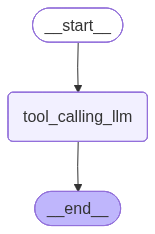

In [45]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

If we pass in `Hello!`, the LLM responds without any tool calls.

In [46]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! 👋 How can I help you today?


The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.

In [47]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (64661d86-6552-448b-a866-14dc2d0c5cce)
 Call ID: 64661d86-6552-448b-a866-14dc2d0c5cce
  Args:
    a: 2
    b: 3


In [48]:
messages['messages']

[HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='e6685f18-1ea5-4989-b95a-bd34f75d7df1'),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'gpt-oss:20b-cloud', 'created_at': '2025-10-06T19:19:41.631285094Z', 'done': True, 'done_reason': 'tool_calls', 'total_duration': 629976671, 'load_duration': None, 'prompt_eval_count': 136, 'prompt_eval_duration': None, 'eval_count': 42, 'eval_duration': None, 'model_name': 'gpt-oss:20b-cloud'}, id='run--b0d67cb5-ff4d-4666-9729-47a7682ced99-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': '64661d86-6552-448b-a866-14dc2d0c5cce', 'type': 'tool_call'}], usage_metadata={'input_tokens': 136, 'output_tokens': 42, 'total_tokens': 178})]

In [49]:
### trying a new message with the Langgraph

my_message = graph.invoke({'messages':HumanMessage(content='tell me something humans do not know')})

for n in my_message['messages']:
    n.pretty_print()

================================ Human Message =================================

tell me something humans do not know
================================== Ai Message ==================================

Sure! There are plenty of intriguing puzzles that people are still trying to solve—things that scientists, engineers, and philosophers have not yet fully explained. Here are a few classic examples:

| Mystery | Why it’s still unknown | Current status |
|---------|------------------------|----------------|
| **What is the nature of dark matter?** | We can infer it exists from its gravitational effects, but we don’t know what particles—or something else entirely—make it up. | Numerous experiments (direct detection, collider searches, indirect astrophysical probes) are ongoing, but no definitive signal has yet been observed. |
| **How did life originate on Earth?** | We know life is common in theory, but we lack a clear, experimentally verified pathway from simple chemistry to self‑replicati

In [50]:
my_message['messages']

[HumanMessage(content='tell me something humans do not know', additional_kwargs={}, response_metadata={}, id='be9d7876-103c-4f4c-ad03-69692b008314'),
 AIMessage(content='Sure! There are plenty of intriguing puzzles that people are still trying to solve—things that scientists, engineers, and philosophers have not yet fully explained. Here are a few classic examples:\n\n| Mystery | Why it’s still unknown | Current status |\n|---------|------------------------|----------------|\n| **What is the nature of dark matter?** | We can infer it exists from its gravitational effects, but we don’t know what particles—or something else entirely—make it up. | Numerous experiments (direct detection, collider searches, indirect astrophysical probes) are ongoing, but no definitive signal has yet been observed. |\n| **How did life originate on Earth?** | We know life is common in theory, but we lack a clear, experimentally verified pathway from simple chemistry to self‑replicating organisms. | Prebiotic 